In [2]:
from tqdm import tqdm

from itertools import permutations
import itertools
import sys

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("Dark2")

In [69]:
def generate_data(n1 = 100, 
                  n2 = 100, 
                  mu1 = [1, 1], 
                  mu2 = [-1, -1], 
                  cov = 1.75*np.eye(2), 
                  colors = sns.color_palette("Dark2")
                 ):
    np.random.seed(1)
                   
    # Plot multivariate normal with same covariance structure.
    Z1 = np.random.multivariate_normal(mu1, cov, n1)
    Z2 = np.random.multivariate_normal(mu2, cov, n1)
    
    return Z1, Z2

def plot_data(Z1, 
              Z2, 
              col1 = colors[0], 
              col2 = colors[2], 
              filename = 'cml_data.png', 
              test_point = None, 
              opacity = 1, 
              lines = None, 
              project = False,
              color_lines = False,
             ):
    sns.set()
    
    # Color data.
    n1 = Z1.shape[0]
    c1 = n1*[col1]
    n2 = Z2.shape[0]
    c2 = n2*[col2]
    
    lim = 5
    fig, ax = plt.subplots(1,1, figsize=(8,8))
    
    # Test point.
    if test_point: ax.scatter(test_point[0], test_point[1], s=100, c='k', marker='o')
        
    # Data.
    ax.scatter(Z1[:, 0], Z1[:, 1], alpha = opacity, s=90, marker='.', c=c1)
    ax.scatter(Z2[:, 0], Z2[:, 1], alpha = opacity, s=90, marker='.', c=c2)
    ax.set_ylim(-lim, lim)
    ax.set_xlim(-lim, lim)
    ax.set_aspect('equal')
    
    # Representation lines.
    if lines:
        for line in lines:
            xmin = -lim*line[0]
            xmax = (lim + 0.05)*line[0]
            ymin = -lim*line[1]
            ymax = (lim + 0.05)*line[1]
            h1 = 'k'
            h2 = 'k'
            if color_lines:
                # Color lines according to class colors.
                m1 = np.mean(Z1, axis = 0)
                if np.dot(m1, line) > 0:
                    h1 = col1
                    h2 = col2
                else:
                    h1 = col2
                    h2 = col1
            ax.plot(np.linspace(0, xmax, 10), np.linspace(0, ymax, 10), c=h1, alpha=0.75)
            ax.plot(np.linspace(xmin, 0, 10), np.linspace(ymin, 0, 10), c=h2, alpha=0.75)
            if project:
                proj = np.dot(np.array(test_point), np.array(line)) * np.array(line) / np.dot(np.array(line), np.array(line))
                ax.scatter(proj[0], proj[1], s = 100, marker='*', c='k')
                # Plot line from test point to projection.
                ax.plot(np.linspace(test_point[0], proj[0], 10), np.linspace(test_point[1], proj[1], 10), c='k', linestyle = '--', alpha=0.75)
                

    ax.set_yticks([])
    ax.set_xticks([])

    plt.savefig(filename, dpi = 500)

[1.29983697 0.9824351 ]


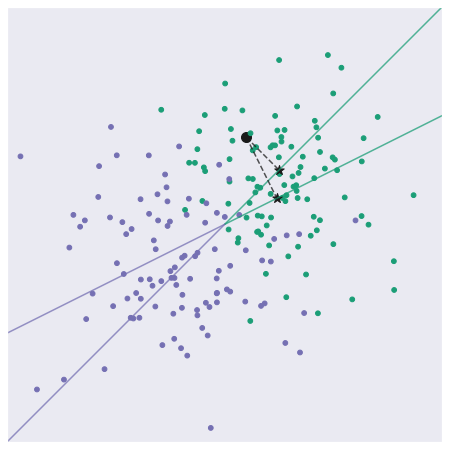

In [71]:
Z1, Z2 = generate_data()
test_point = [0.5, 2]
lines = [[1,1], [2, 1]]
plot_data(Z1, Z2, test_point = test_point, lines = lines, project = True, color_lines = True)